In [17]:
# Adapted from 
# https://github.com/KaihuaTang/Scene-Graph-Benchmark.pytorch/blob/master/visualization/3.visualize_custom_SGDet.ipynb

In [9]:
# import torch
import json
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw
import os

In [3]:
# load the following to files from DETECTED_SGG_DIR
# custom_prediction = json.load(open('/home/kaihua/checkpoints/test/custom_prediction.json'))
objects = json.load(open('objects.json'))
relationships = json.load(open('relationships.json'))
# custom_data_info = json.load(open('/home/kaihua/checkpoints/test/custom_data_info.json'))
image_data = json.load(open('image_data.json'))
dicts = json.load(open('VG-SGG-dicts.json'))

In [15]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    # x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    x1,y1,x2,y2 = box['x'], box['y'], box['x']+box['w'], box['y']+box['h']
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    # size = get_size(Image.open(img_path).size)
    # pic = Image.open(img_path).resize(size)
    pic = Image.open(img_path)
    num_obj = len(boxes)
    for i in range(num_obj):
        # info = str(i) + '_' + box_labels[i]
        draw_single_box(pic, boxes[i])
    display(pic)
#     print('*' * 50)
#     print_list('box_labels', box_labels, box_scores)
    # print('*' * 50)
    # print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [6]:
# parameters
image_idx = 327
# box_topk = 30 # select top k bounding boxes
# rel_topk = 20 # select top k relationships
ind_to_classes = dicts['idx_to_label']
ind_to_predicates = dicts['idx_to_predicate']

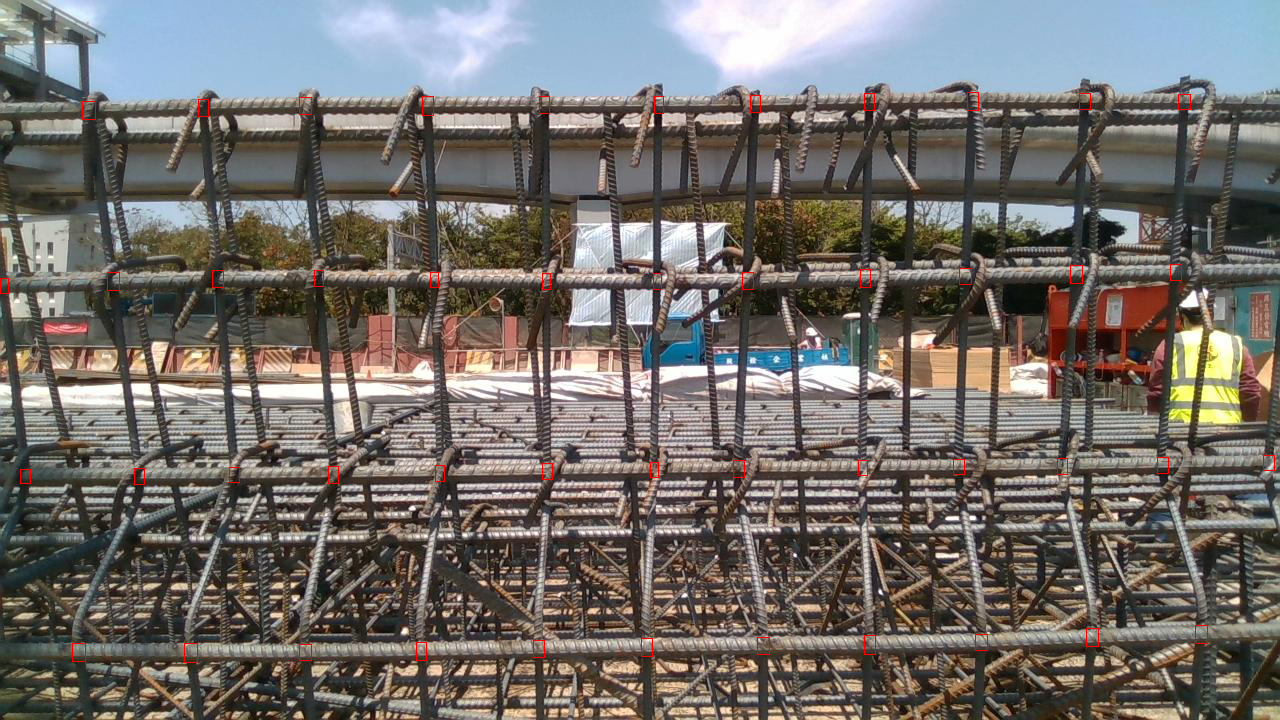

In [16]:
# image_path = custom_data_info['idx_to_files'][image_idx]
image_path = os.path.join('images' ,str(image_idx) + '.jpg')
boxes = objects[image_idx-1]['objects']
# box_labels = objects[image_idx-1]['objects'][:]['name']
box_labels = []
# box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
# all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
# all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
# all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']

# for i in range(len(box_labels)):
#     box_labels[i] = ind_to_classes[box_labels[i]]

rel_labels = []
# rel_scores = []
# for i in range(len(all_rel_pairs)):
#     if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
#         # rel_scores.append(all_rel_scores[i])
#         label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
#         rel_labels.append(label)

# rel_labels = rel_labels[:rel_topk]
# rel_scores = rel_scores[:rel_topk]

# draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)
draw_image(image_path, boxes, box_labels, rel_labels)

In [39]:
import matplotlib.pyplot as plt

In [44]:
# Adapted from
# https://github.com/danfeiX/scene-graph-TF-release/blob/master/lib/datasets/viz.py

def viz_scene_graph(im, rois, labels, inds=None, rels=None, preprocess=False):
    """
    visualize a scene graph on an image
    """
    # if inds is None:
    #     inds = np.arange(rois.shape[0])
    # viz_rois = rois[inds]
    # viz_labels = labels[inds]
    viz_rois = rois
    viz_labels = labels
    viz_rels = None
    if rels is not None:
        viz_rels = []
        for rel in rels:
            # if rel[0] in inds and rel[1] in inds:
                # sub_idx = np.where(inds == rel[0])[0][0]
                # obj_idx = np.where(inds == rel[1])[0][0]
                # viz_rels.append([sub_idx, obj_idx, rel[2]])
                # viz_rels.append([sub_idx, obj_idx])
            viz_rels.append([rel[0], rel[1]])
        viz_rels = np.array(viz_rels)
    return _viz_scene_graph(im, viz_rois, viz_labels, viz_rels, preprocess)


def _viz_scene_graph(im, rois, labels, rels=None, preprocess=False):
    if preprocess:
        # transpose dimensions, add back channel means
        im = (im.copy() + cfg.PIXEL_MEANS)[:, :, (2, 1, 0)].astype(np.uint8)

    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(im, aspect='equal')
    if rels.size > 0:
        rel_inds = rels[:,:2].ravel().tolist()
    else:
        rel_inds = []
    # draw bounding boxes
    for i, bbox in enumerate(rois):
        # if int(labels[i]) == 0 and i not in rel_inds:
        #     continue
        ax.add_patch(
            plt.Rectangle((bbox['x'], bbox['y']),
                          # bbox[2] - bbox[0],
                          # bbox[3] - bbox[1],
                          bbox['w'], bbox['h'],
                          fill=False,
                          edgecolor='red', linewidth=1)
            )
        # label_str = cfg.ind_to_class[int(labels[i])]
        # ax.text(bbox[0], bbox[1] - 2,
        #         label_str,
        #         bbox=dict(facecolor='blue', alpha=0.5),
        #         fontsize=14, color='white')

    # draw relations
    for i, rel in enumerate(rels):
        # if rel[2] == 0: # ignore bachground
        #     continue
        sub_box = rois[rel[0]-rois[0]['object_id']]
        obj_box = rois[rel[1]-rois[0]['object_id']]
        obj_ctr = [obj_box['x']+obj_box['w']/2, obj_box['y']+obj_box['h']/2]
        sub_ctr = [sub_box['x']+sub_box['w']/2, sub_box['y']+sub_box['h']/2]
        line_ctr = [(sub_ctr[0] + obj_ctr[0]) / 2, (sub_ctr[1] + obj_ctr[1]) / 2]
        # predicate = cfg.ind_to_predicate[int(rel[2])]
        ax.arrow(sub_ctr[0], sub_ctr[1], obj_ctr[0]-sub_ctr[0], obj_ctr[1]-sub_ctr[1], color='green')

        # ax.text(line_ctr[0], line_ctr[1], predicate,
        #         bbox=dict(facecolor='green', alpha=0.5),
        #         fontsize=14, color='white')

    ax.set_title('Scene Graph Visualization', fontsize=14)
    ax.axis('off')
    fig.tight_layout()
    plt.show()

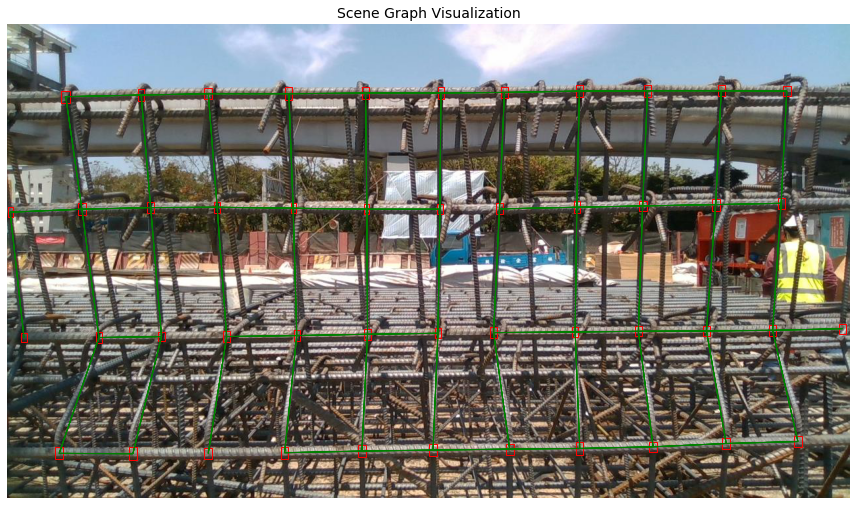

In [45]:
image = Image.open(image_path)
boxes = objects[image_idx-1]['objects']
box_labels = None

rel = []
for n in range(len(relationships[image_idx-1]['relationships'])):
    rel.append([relationships[image_idx-1]['relationships'][n]['subject']['object_id'], relationships[image_idx-1]['relationships'][n]['object']['object_id']])

viz_scene_graph(image, boxes, box_labels, None, rel)

In [53]:
image_idx = 2

In [54]:
image_path = os.path.join('images' ,str(image_idx) + '.jpg')
image = Image.open(image_path)
boxes = objects[image_idx-1]['objects']
box_labels = None

rel = []
for n in range(len(relationships[image_idx-1]['relationships'])):
    rel.append([relationships[image_idx-1]['relationships'][n]['subject']['object_id'], relationships[image_idx-1]['relationships'][n]['object']['object_id']])

viz_scene_graph(image, boxes, box_labels, None, rel)

In [55]:
rel

[[14, 15],
 [15, 14],
 [32, 16],
 [16, 32],
 [17, 18],
 [18, 17],
 [33, 19],
 [19, 33],
 [14, 17],
 [17, 14],
 [15, 18],
 [18, 15],
 [16, 19],
 [19, 16],
 [17, 20],
 [20, 17],
 [20, 21],
 [21, 20],
 [34, 22],
 [22, 34],
 [19, 22],
 [22, 19],
 [29, 30],
 [30, 29],
 [28, 29],
 [29, 28],
 [25, 26],
 [26, 25],
 [24, 25],
 [25, 24],
 [23, 24],
 [24, 23],
 [18, 21],
 [21, 18],
 [34, 33],
 [33, 34]]